# 구글 드라이브에서 다운로드 받기

In [1]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From (original): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
From (redirected): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd&confirm=t&uuid=21bacedf-da61-4d8b-8fb9-a996139e1db2
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:33<00:00, 25.7MB/s]


'dogs-vs-cats.zip'

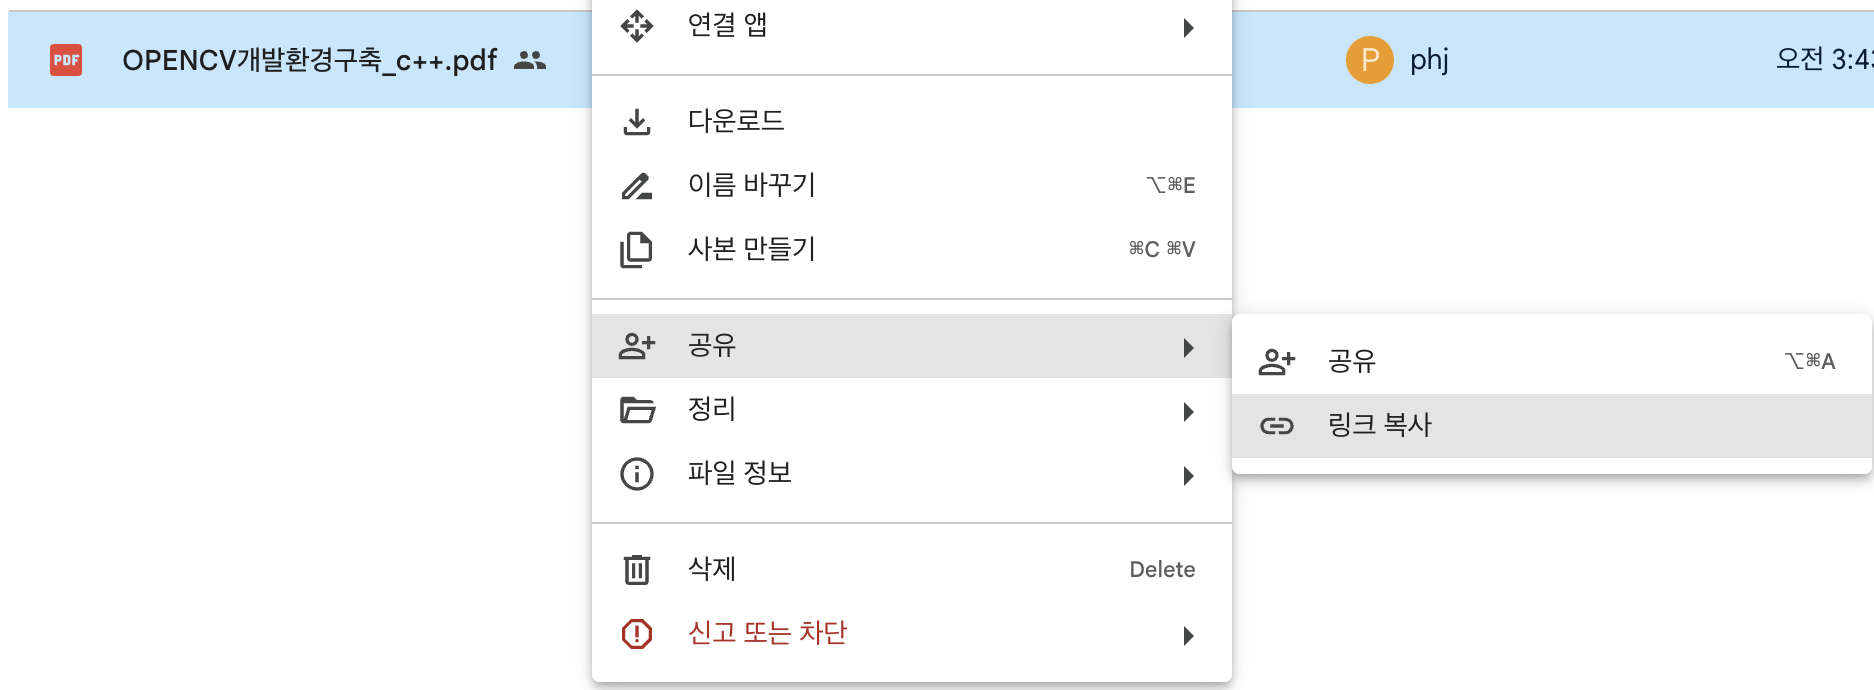

### https://drive.google.com/file/d/1phaee0HpASd5ICSTEBYDBCyvlCka1Cc3/view?usp=drive_link

In [3]:
id='1phaee0HpASd5ICSTEBYDBCyvlCka1Cc3'
gdown.download(id=id, output='OPENCV_C++.pdf')

Downloading...
From: https://drive.google.com/uc?id=1phaee0HpASd5ICSTEBYDBCyvlCka1Cc3
To: /content/OPENCV_C++.pdf
100%|██████████| 5.04M/5.04M [00:00<00:00, 11.9MB/s]


'OPENCV_C++.pdf'

# 캐글에서 다운로드 받기
### 캐글의 json 파일(인증키) 코랩에 업로드하기

In [ ]:
# kaggle.json 파일을 업로드하세요.
from google.colab import files
files.upload()

## 파일을 복사하고 권한 설정하기

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 캐글에서 데이터셋 다운로드 받기

In [ ]:
!kaggle competitions download -c dogs-vs-cats

## 압축파일 풀기

In [4]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

## 데이터셋을 train, validation,test 서브 폴더에 나누어 담기

In [5]:
import os, shutil, pathlib

data_dir = "dogs-vs-cats-small"

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path(data_dir)

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("val", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt

In [94]:
# 하이퍼파라미터 설정
batch_size = 32
num_epochs = 30
learning_rate = 0.001

In [54]:
# 데이터 전처리 설정
transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

    ])
}

# 데이터셋 로드
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform['train'])
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform['test'])
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform['test'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [55]:
images, labels= next(iter(train_loader))
images[0].shape, labels[0].shape

(torch.Size([3, 224, 224]), torch.Size([]))

In [56]:
labels_map = {
    0: "cats",
    1: "dogs",
}

In [57]:
labels

tensor([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0])

In [58]:
labels[0].item()

0

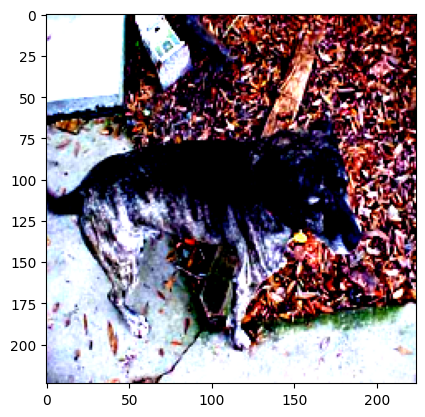

Label: dogs


In [68]:
import random
num = random.randint(0, batch_size-1)
imageNorm = images[num].permute(1, 2, 0)
#print(imageNorm)
imageDenorm = imageNorm.numpy()
imageDisp = imagesDenorm.astype('uint8')
plt.imshow(imageDenorm)
plt.show()


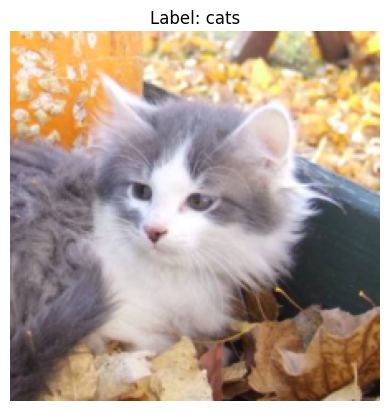

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# train_loader에서 배치 가져오기
images, labels = next(iter(train_loader))

num = random.randint(0, batch_size-1)

# 첫 번째 이미지 가져오기
image = images[num]  # 이미지는 [C, H, W] 형식의 텐서
label = labels[num]  # 해당 이미지의 라벨

# 이미지를 [H, W, C]로 변환
image = image.permute(1, 2, 0)  # [C, H, W] -> [H, W, C]

# 이미지 복원 (Normalize 역변환)
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image = std * image.numpy() + mean
image = np.clip(image, 0, 1)  # 값의 범위를 [0, 1]로 클리핑

# 이미지 시각화
plt.imshow(image)
plt.title(f'Label: {labels_map[labels[num].item()]}')
plt.axis('off')  # 축 제거
plt.show()

In [84]:
# 간단한 CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [85]:
# 모델, 손실 함수, 옵티마이저 정의
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [86]:
# 훈련 및 검증 함수
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return running_loss / len(train_loader), 100 * correct / total

In [87]:
def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return running_loss / len(val_loader), 100 * correct / total

In [88]:
# 훈련 루프
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

Epoch 1/10, Train Loss: 0.8294, Train Acc: 54.00%, Val Loss: 0.6677, Val Acc: 57.70%
Epoch 2/10, Train Loss: 0.6686, Train Acc: 56.55%, Val Loss: 0.7007, Val Acc: 57.10%
Epoch 3/10, Train Loss: 0.6673, Train Acc: 57.15%, Val Loss: 0.7393, Val Acc: 52.10%
Epoch 4/10, Train Loss: 0.6459, Train Acc: 59.50%, Val Loss: 0.6545, Val Acc: 59.30%
Epoch 5/10, Train Loss: 0.6281, Train Acc: 61.10%, Val Loss: 0.6523, Val Acc: 60.00%
Epoch 6/10, Train Loss: 0.6131, Train Acc: 63.10%, Val Loss: 0.6287, Val Acc: 60.80%
Epoch 7/10, Train Loss: 0.5993, Train Acc: 64.20%, Val Loss: 0.6401, Val Acc: 60.50%
Epoch 8/10, Train Loss: 0.6057, Train Acc: 63.90%, Val Loss: 0.6375, Val Acc: 62.20%
Epoch 9/10, Train Loss: 0.5913, Train Acc: 65.30%, Val Loss: 0.7338, Val Acc: 59.40%
Epoch 10/10, Train Loss: 0.5969, Train Acc: 65.65%, Val Loss: 0.6347, Val Acc: 61.60%


In [89]:
test_loss, test_acc = validate(model, test_loader, criterion, device)
print(f'Test Loss: {val_loss:.4f}, Test Acc: {val_acc:.2f}%')

Test Loss: 0.6347, Test Acc: 61.60%


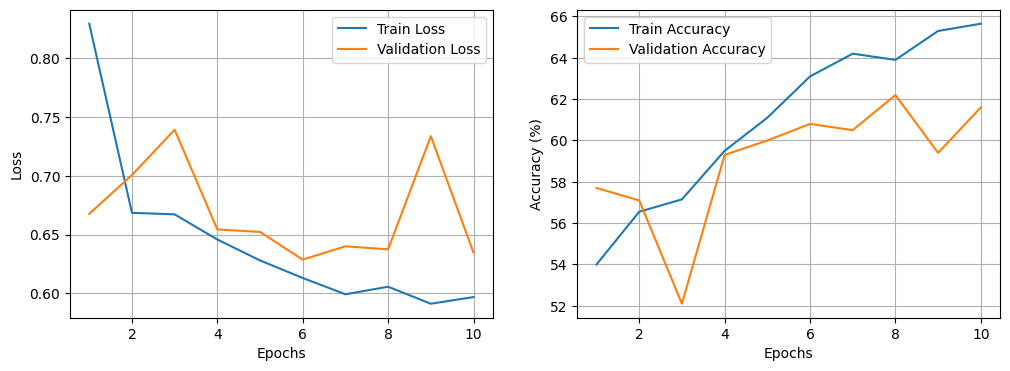

In [90]:
# 학습 후 결과 그래프 그리기
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.show()


In [95]:
# EfficientNet-V2 Small 모델 불러오기 (사전 학습된 가중치 사용)
model = models.efficientnet_v2_s(pretrained=True)

# 마지막 레이어를 2개의 클래스로 변경 (개, 고양이)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)

# 모델을 GPU로 이동
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# 학습 루프
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

Epoch 1/30, Train Loss: 0.1883, Train Acc: 93.10%, Val Loss: 0.2827, Val Acc: 90.50%
Epoch 2/30, Train Loss: 0.1288, Train Acc: 94.85%, Val Loss: 0.1087, Val Acc: 96.10%
Epoch 3/30, Train Loss: 0.1142, Train Acc: 96.80%, Val Loss: 0.1340, Val Acc: 94.40%
Epoch 4/30, Train Loss: 0.0838, Train Acc: 97.25%, Val Loss: 0.1896, Val Acc: 92.00%
Epoch 5/30, Train Loss: 0.0486, Train Acc: 98.15%, Val Loss: 0.0846, Val Acc: 97.00%
Epoch 6/30, Train Loss: 0.0369, Train Acc: 98.80%, Val Loss: 0.1205, Val Acc: 95.60%
Epoch 7/30, Train Loss: 0.0626, Train Acc: 98.10%, Val Loss: 0.2022, Val Acc: 93.60%
Epoch 8/30, Train Loss: 0.0897, Train Acc: 96.90%, Val Loss: 0.1090, Val Acc: 95.50%
Epoch 9/30, Train Loss: 0.0590, Train Acc: 97.85%, Val Loss: 0.1376, Val Acc: 94.70%
Epoch 10/30, Train Loss: 0.0315, Train Acc: 98.95%, Val Loss: 0.1378, Val Acc: 95.70%
Epoch 11/30, Train Loss: 0.0306, Train Acc: 99.15%, Val Loss: 0.1183, Val Acc: 94.90%
Epoch 12/30, Train Loss: 0.0532, Train Acc: 98.15%, Val Loss: 0

In [96]:
test_loss, test_acc = validate(model, test_loader, criterion, device)
print(f'Test Loss: {val_loss:.4f}, Test Acc: {val_acc:.2f}%')

Test Loss: 0.1366, Test Acc: 96.30%


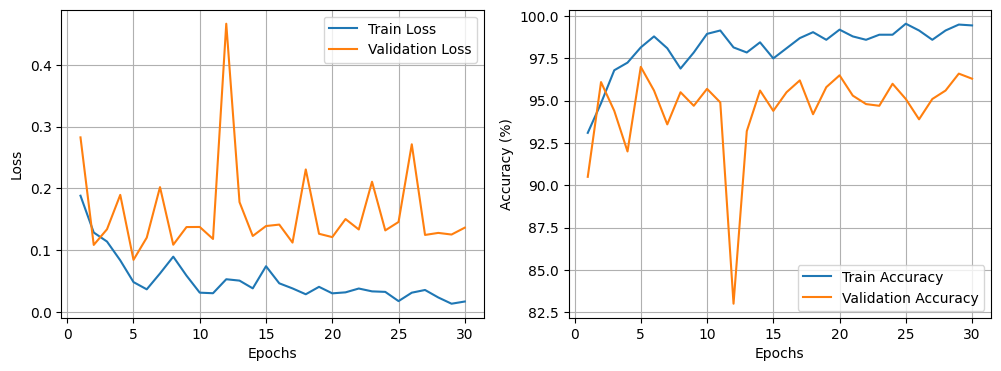

In [97]:
# 학습 후 결과 그래프 그리기
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.show()